<a href="https://colab.research.google.com/github/torcodex/Height_Prediction_Model/blob/main/Height_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ML formula for linear regression is y = mx + c
# y - output, m - slope[m=Yval/Xval] , c - intercept

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as Lr

In [3]:
phys_data = pd.read_csv("/content/drive/MyDrive/weight-height.csv")
phys_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
phys_data.isna().sum()

,0
Gender,0
Height,0
Weight,0


In [5]:
phys_data.drop_duplicates()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [6]:
phys_data_copy = phys_data.copy()

In [7]:
del phys_data_copy['Gender']
phys_data_copy

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [8]:
phys_data_copy['Height_cm'] = phys_data_copy['Height'] * 2.54
phys_data_copy['Weight_kg'] = phys_data_copy['Weight'] * 0.45
del phys_data_copy['Height']
del phys_data_copy['Weight']
phys_data_copy

,Height_cm,Weight_kg
0,187.571423,108.852103
1,174.706036,73.039713
2,188.239668,95.733385
3,182.196685,99.019112
4,177.499761,92.857410
...,...,...
9995,168.078536,61.549854
9996,170.350573,76.890558
9997,162.224700,57.813893
9998,175.346978,73.733608


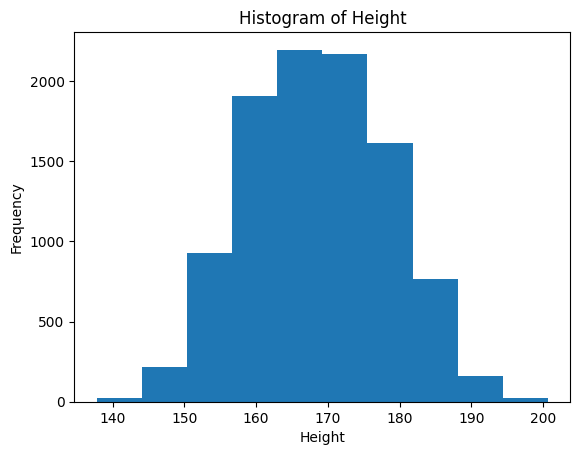

In [9]:
plt.hist(phys_data_copy['Height_cm'])
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Height')
plt.show()

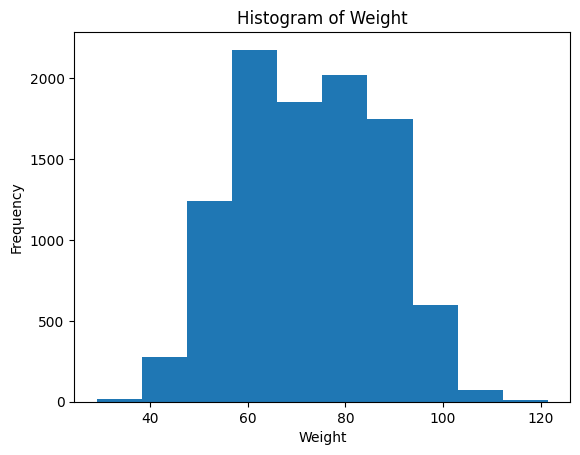

In [10]:
plt.hist(phys_data_copy['Weight_kg'])
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Height vs Weight')

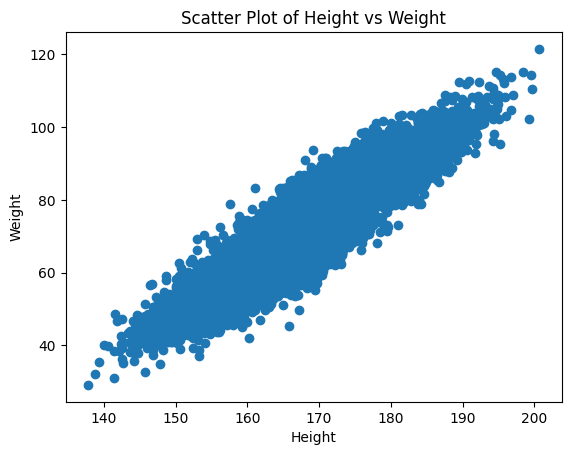

In [11]:
plt.scatter(phys_data_copy['Height_cm'], phys_data_copy['Weight_kg'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs Weight')

In [12]:
phys_data_copy.corr()
# is used to find the multicolinearity

,Height_cm,Weight_kg
Height_cm,1.000000,0.924756
Weight_kg,0.924756,1.000000


In [13]:
x = phys_data_copy[['Weight_kg']]
y = phys_data_copy[['Height_cm']]
# linear_model = LinearRegression() - creates an instance for Linear regression model
# This sets up the mathematical model: y=mx+c
# m → slope (coefficient)
# c → intercept
linear_model = Lr()
# linear_model.fit(x, y)
# Trains the linear regression model using:
#   x → independent variable (Weight)
#   y → dependent variable (Height)
# during .fit() The algorithm finds the best-fitting straight line by minimizing Mean Squared Error (MSE).
# Calculates:
# linear_model.coef_ → slope
# linear_model.intercept_ → height when weight is zero
linear_model.fit(x,y)


LinearRegression()

In [14]:
linear_model.coef_
# slope value or m in y=mx+c

array([[0.62547666]])

In [15]:
linear_model.intercept_
# intercept value or c in y=mx+c

array([123.13387264])

In [16]:
# giving data in the data format required by linear regression model
# columns=['Weight_kg'] is used because the model was trained using column name,
# the input is also given with the same column name to avoid warnings!
x_test = pd.DataFrame([95,75,110,125], columns=['Weight_kg'])
x_test

,Weight_kg
0,95
1,75
2,110
3,125


In [17]:
# .predict() is used to get predictions from the model
linear_model.predict(x_test)

array([[182.55415574],
       [170.04462246],
       [191.9363057 ],
       [201.31845567]])

In [18]:
y_pred = linear_model.predict(x)
y_pred

array([[191.21832319],
       [168.81850845],
       [183.01287094],
       ...,
       [159.29511386],
       [169.25252357],
       [155.12206037]])

In [19]:
error = y-y_pred
error

,Height_cm
0,-3.646900
1,5.887528
2,5.226797
3,-2.871331
4,-3.714254
...,...
9995,6.446666
9996,-0.876549
9997,2.929586
9998,6.094454


In [20]:
error.mean()

,0
Height_cm,-1.916760e-14


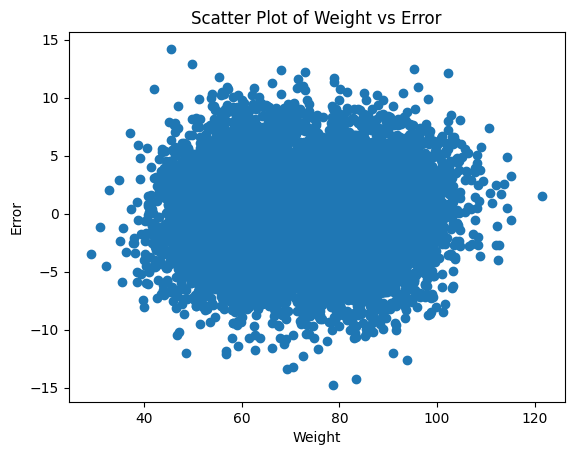

In [21]:
plt.scatter(x=phys_data_copy['Weight_kg'], y=error)
plt.xlabel('Weight')
plt.ylabel('Error')
plt.title('Scatter Plot of Weight vs Error')
plt.show()

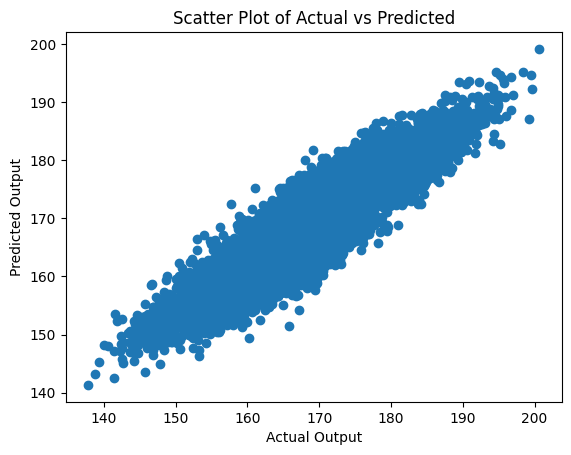

In [22]:
plt.scatter(x=y, y=y_pred)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Scatter Plot of Actual vs Predicted')
plt.show()

In [24]:
from pickle import dump, load
dump(linear_model, open('linear_model.pkl', 'wb'))
loaded = load(open('linear_model.pkl', 'rb'))
loaded.predict(x_test)

array([[182.55415574],
       [170.04462246],
       [191.9363057 ],
       [201.31845567]])